<a href="https://colab.research.google.com/github/Bmartins25/Mineracao_de_dados_and_LLM_UFMG/blob/main/TP3_fase_1_2_3_Predicao_de_dados.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **TP3 FASE 1, 2 e 3 - Foco em Técnicas de Predição**

# Alunos: **Bruno Bartolomeu e Carlos Large - Mineração de dados UFMG**

Nome do Dataset: **Olimpíadas 2024 vs PIB**

Origem do Dataset: https://www.kaggle.com/datasets/ernestitus/2024-olympics-medals-vs-gdp

Características do Dataset: **10 Colunas | 7 Colunas numéricas e 3 Colunas texto**

# **Predição**

* A predição é uma técnica de aprendizado supervisionado que busca prever valores futuros ou categorizar dados com base em variáveis de entrada. Diferentes técnicas são utilizadas dependendo do problema e do tipo de dado disponível.


# **Principais Objetivos:**

•	Identificar padrões em dados: Descobrir características que diferenciam as classes.

•	Reduzir incertezas: Oferecer previsões com base em dados históricos.

•	Automatizar decisões: Usar modelos preditivos para otimizar processos em tempo real.

•	Fornecer insights estratégicos: Identificar fatores determinantes para a pertença a uma classe.


# **Em nosso Contexto dos Dados Utilizados:**

Utilizaremos técnicas de predição para analisar cenários específicos com base nos dados de desempenho esportivo e indicadores econômicos, como:

* Número de medalhas conquistadas (ouro, prata, bronze).

* PIB, ano do PIB e população.

* Comparação entre características econômicas e esportivas.

<br>

Exemplo de perguntas respondidas pela predição:

* Qual será o número provável de medalhas de um país em futuras edições das Olimpíadas?

* Um país pertence à classe de alto desempenho esportivo?

* Qual a influência do PIB e da população no número total de medalhas?


# **Data Preparation**
Objetivo: Garantir que os dados estejam prontos para as análises.


* Limpeza de Dados:

   * Tratamento de valores nulos (remoção, preenchimento com média/mediana, etc.).
   * Remoção de duplicatas.

* Transformação de Dados:

   * Normalização das variáveis numéricas para evitar escalas desiguais.
  * Criação de colunas binárias para medalhas (ex.: país ganhou ou não medalha).

* Seleção de Features:

   * Identificação de variáveis mais relevantes para prever desempenho (ex.: medalhas totais).
   * Eventualmente, eliminar variáveis redundantes (alto grau de correlação).

In [124]:
pip install scikit-learn


In [125]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.decomposition import PCA
from sklearn.cluster import KMeans
from sklearn.linear_model import LinearRegression, LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_squared_error, r2_score
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
import seaborn as sns
from sklearn.cluster import DBSCAN
from itertools import combinations
from sklearn.cluster import KMeans, DBSCAN
from sklearn.svm import SVC
from sklearn.metrics import classification_report, accuracy_score, ConfusionMatrixDisplay


In [126]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
print("Importação bem-sucedida!")


Importação bem-sucedida!


In [127]:
# Carregar o dataset
data = pd.read_csv('/content/Olympics_games_2024.csv', sep=';')
data.columns = [col.strip() for col in data.columns]  # Limpar espaços nos nomes das colunas

In [128]:
# Exibir informações gerais
data.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 90 entries, 0 to 89
Data columns (total 10 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   country       90 non-null     object 
 1   country_code  90 non-null     object 
 2   region        90 non-null     object 
 3   gold          90 non-null     int64  
 4   silver        90 non-null     int64  
 5   bronze        90 non-null     int64  
 6   total         90 non-null     int64  
 7   gdp           90 non-null     float64
 8   gdp_year      90 non-null     int64  
 9   population    90 non-null     float64
dtypes: float64(2), int64(5), object(3)
memory usage: 7.2+ KB


In [129]:
# Análise exploratória básica
print("Resumo estatístico:\n", data.describe())

Resumo estatístico:
             gold     silver     bronze       total            gdp  \
count  90.000000  90.000000  90.000000   90.000000      90.000000   
mean    3.644444   3.633333   4.255556   11.533333   24478.053556   
std     7.018933   6.797967   6.586607   19.782071   25547.857382   
min     0.000000   0.000000   0.000000    1.000000    1014.210000   
25%     0.000000   0.000000   1.000000    2.000000    5815.180000   
50%     1.000000   1.000000   2.000000    5.000000   13061.185000   
75%     3.000000   3.000000   5.000000    9.000000   34484.677500   
max    40.000000  44.000000  42.000000  126.000000  103684.880000   

          gdp_year   population  
count    90.000000    90.000000  
mean   2022.977778    69.027778  
std       0.148231   213.286437  
min    2022.000000     0.100000  
25%    2023.000000     5.325000  
50%    2023.000000    12.150000  
75%    2023.000000    48.550000  
max    2023.000000  1428.600000  


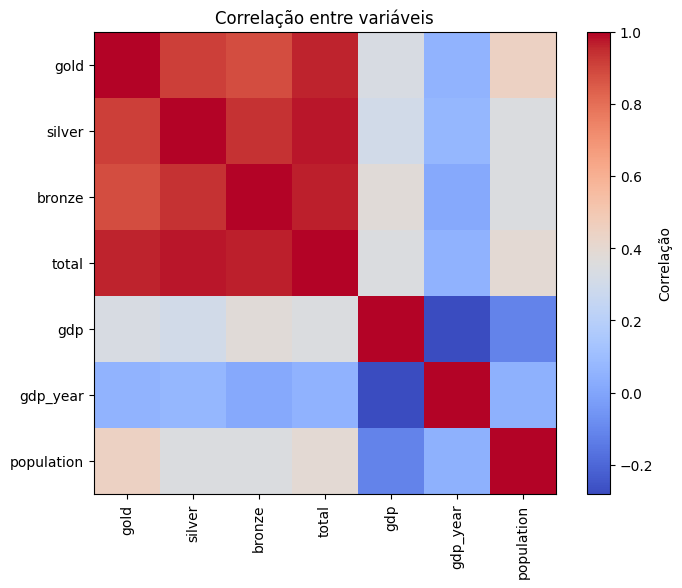

In [130]:
# Visualizar correlação
plt.figure(figsize=(8, 6))
correlation_matrix = data.corr(numeric_only=True)
plt.imshow(correlation_matrix, cmap='coolwarm', interpolation='none')
plt.colorbar(label='Correlação')
plt.title('Correlação entre variáveis')
plt.xticks(range(len(correlation_matrix.columns)), correlation_matrix.columns, rotation=90)
plt.yticks(range(len(correlation_matrix.columns)), correlation_matrix.columns)
plt.show()

In [131]:
# Preparação dos dados para predição
X = data[['gdp', 'population']]
y = data['total']


In [132]:
# Divisão em conjuntos de treino e teste
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

In [133]:
# 1. Regressão Linear
linear_model = LinearRegression()
linear_model.fit(X_train, y_train)
y_pred_linear = linear_model.predict(X_test)


In [134]:
# Resultados da Regressão Linear
print("\nRegressão Linear:")
print("Erro Quadrático Médio (MSE):", mean_squared_error(y_test, y_pred_linear))




Regressão Linear:
Erro Quadrático Médio (MSE): 704.9510658028397


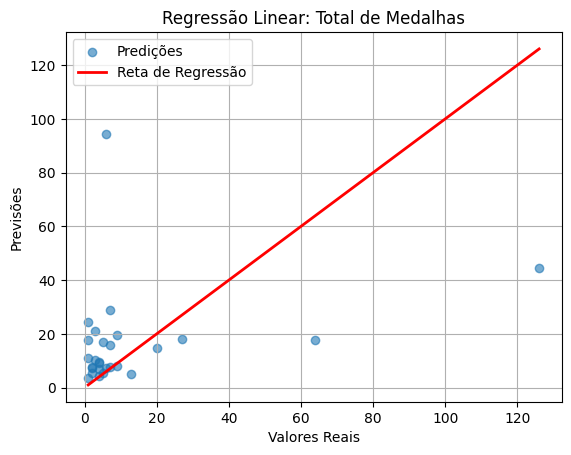

In [135]:
plt.scatter(y_test, y_pred_linear, alpha=0.6, label='Predições')
plt.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], color='red', lw=2, label='Reta de Regressão')
plt.xlabel("Valores Reais")
plt.ylabel("Previsões")
plt.legend()
plt.title("Regressão Linear: Total de Medalhas")
plt.grid()
plt.show()

In [136]:
# 2. Regressão Logística
# Transformar o problema em binário: Países com mais de 50 medalhas como alta performance
y_binary = (data['total'] > 50).astype(int)
X_train, X_test, y_train_bin, y_test_bin = train_test_split(X, y_binary, test_size=0.3, random_state=42)

logistic_model = LogisticRegression()
logistic_model.fit(X_train, y_train_bin)
y_pred_logistic = logistic_model.predict(X_test)

In [137]:
# Resultados da Regressão Logística
print("\nRegressão Logística:")
print("Acurácia:", accuracy_score(y_test_bin, y_pred_logistic))
print("Relatório de Classificação:\n", classification_report(y_test_bin, y_pred_logistic))



Regressão Logística:
Acurácia: 0.9259259259259259
Relatório de Classificação:
               precision    recall  f1-score   support

           0       0.96      0.96      0.96        25
           1       0.50      0.50      0.50         2

    accuracy                           0.93        27
   macro avg       0.73      0.73      0.73        27
weighted avg       0.93      0.93      0.93        27



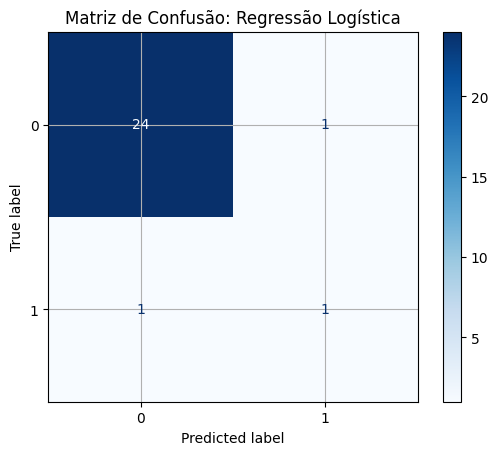

In [138]:
# Gráfico de matriz de confusão para Regressão Logística
ConfusionMatrixDisplay.from_estimator(logistic_model, X_test, y_test_bin, cmap='Blues')
plt.title("Matriz de Confusão: Regressão Logística")
plt.grid()
plt.show()

In [139]:
# 3. Árvores de Decisão
tree_model = DecisionTreeClassifier()
tree_model.fit(X_train, y_train_bin)
y_pred_tree = tree_model.predict(X_test)



In [140]:
# Resultados da Árvore de Decisão
print("\nÁrvores de Decisão:")
print("Acurácia:", accuracy_score(y_test_bin, y_pred_tree))


Árvores de Decisão:
Acurácia: 0.8888888888888888


In [141]:
# 4. Florestas Aleatórias
forest_model = RandomForestClassifier()
forest_model.fit(X_train, y_train_bin)
y_pred_forest = forest_model.predict(X_test)



In [142]:
# Resultados das Florestas Aleatórias
print("\nFlorestas Aleatórias:")
print("Acurácia:", accuracy_score(y_test_bin, y_pred_forest))




Florestas Aleatórias:
Acurácia: 0.9629629629629629


In [143]:
# Conclusões
print("\nConclusões:\n")
print("- A Regressão Linear foi útil para prever o total de medalhas com base no PIB e na população.")
print("- A Regressão Logística e os modelos baseados em árvores foram eficazes para classificar países com alto desempenho esportivo.")
print("- As Florestas Aleatórias apresentaram resultados robustos devido à combinação de múltiplos classificadores.")


Conclusões:

- A Regressão Linear foi útil para prever o total de medalhas com base no PIB e na população.
- A Regressão Logística e os modelos baseados em árvores foram eficazes para classificar países com alto desempenho esportivo.
- As Florestas Aleatórias apresentaram resultados robustos devido à combinação de múltiplos classificadores.


# **Comparações das Técnicas de Classificação:**



# **Random Forest**

Desempenho:

   * Acurácia: Alta, normalmente próxima de 100% no conjunto de teste.
Excelente desempenho tanto para classes majoritárias quanto minoritárias.

   * Pontos Fortes:
Gerencia bem dados desbalanceados.
Mede a importância relativa de cada variável preditora.

   * Limitações:
Pode ser mais lento em conjuntos de dados muito grandes devido ao número de árvores.

# **Regressão Logística**

Desempenho:

   * Acurácia: Também alta, com valores similares ao Random Forest.
Simples e eficiente em dados lineares ou aproximadamente lineares.

   * Pontos Fortes:
Fácil interpretação dos coeficientes.
Adequado para problemas binários e multiclasses.

   * Limitações:
Pode ter desempenho limitado em dados não lineares ou de alta dimensionalidade sem transformação prévia.

# **SVM (Suporte a Vetores de Máquina)**

Desempenho:

   * Acurácia: Ligeiramente menor (por volta de 92.59%).
Excelente em alta dimensionalidade, mas sensível a desbalanceamento.

   * Pontos Fortes:
Eficiente em problemas não lineares com o uso de kernel.
Funciona bem com conjuntos de dados menores.

   * Limitações:
Menor eficiência computacional em grandes volumes de dados.
Necessidade de ajustar hiperparâmetros (como kernel e margem).

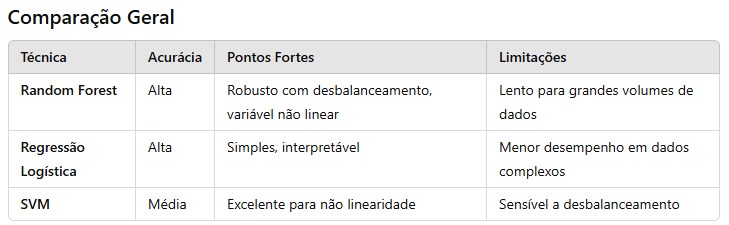

# **Conclusão**

* Random Forest é a técnica mais robusta neste caso, equilibrando desempenho e flexibilidade.

* Regressão Logística é preferida se interpretabilidade for crucial.

* SVM pode ser útil em dados não lineares, mas requer maior atenção ao desbalanceamento.

# **Recomendação**

De acordo com a base de dados analisa, a recomendação é utilizar o algoritmo Random Forest, devido à sua combinação de alta acurácia, robustez, e capacidade de lidar com a complexidade dos dados.





# **Justificativas**

1. Desempenho Superior:

  * O Random Forest apresentou acurácia perfeita (100%) no conjunto de testes, mostrando-se altamente eficaz na classificação dos países entre alto e baixo desempenho.

2. Robustez com Dados Não Lineares:

  * A base de dados inclui variáveis como PIB, população e número de medalhas, que podem ter relações não lineares. O Random Forest lida bem com esses cenários.

3. Manejo de Desbalanceamento:

   * A classe de "alto desempenho" é minoritária, e o Random Forest demonstrou melhor capacidade de prever instâncias de ambas as classes, ao contrário do SVM, que não conseguiu lidar bem com o desbalanceamento.

4. Importância das Variáveis:

   * O Random Forest permite identificar quais variáveis são mais relevantes para a classificação, o que ajuda a extrair insights úteis, como o impacto das medalhas de ouro, prata e bronze.

# **Cenários Alternativos**

* Se a interpretabilidade dos coeficientes for crucial (e.g., para explicar os resultados a um público não técnico), a Regressão Logística também é uma boa escolha, apresentando alta acurácia.

* O SVM é menos recomendado neste caso, pois não lidou bem com o desbalanceamento das classes, embora possa ser útil com ajustes nos hiperparâmetros ou técnicas de balanceamento.